<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/Korea_population_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# 설치된 나눔 폰트 중 원하는 폰트의 전체 경로 가져오기
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


# 런타임 다시 시작

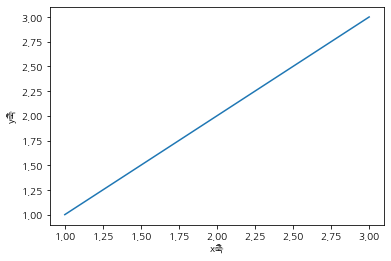

In [ ]:
import matplotlib.pyplot as plt

# 한글로 x축, y축 이름 설정하여 그래프 그리기
plt.rc('font', family='NanumGothic')
plt.plot([1,2,3], [1,2,3])
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 코랩에 파일 업로드하기 위한 코드
from google.colab import files
uploaded = files.upload()

Saving age.csv to age.csv


In [ ]:
# csv 파일 불러와서 dataframe 생성
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9857426,9857426,61253,70532,74322,72482,71688,78941,75386,75929,71772,76157,80577,74502,72380,80264,83081,83791,93326,108584,105344,112807,120957,125632,134735,143930,149420,159845,161550,150999,149562,150485,146573,148015,150838,149335,163855,173092,173138,169187,...,133804,141178,119297,105263,114400,80233,89224,89871,88753,90591,73185,64285,64933,63515,74898,60021,50860,49861,43160,38593,34377,31713,26206,21753,19206,15377,13515,12208,10165,8200,5892,4695,3589,3501,2569,1851,1436,1010,736,5519
서울특별시 종로구 (1111000000),154770,154770,652,794,911,895,859,1046,909,1012,919,1006,1089,1039,1008,1110,1167,1208,1374,1558,1541,1884,2149,2128,2287,2384,2576,2636,2672,2481,2304,2290,2188,2131,2147,2005,2191,2179,2332,2219,...,2175,2329,1939,1706,1862,1275,1465,1501,1465,1618,1279,1201,1206,1277,1489,1266,1094,1086,923,778,779,694,576,493,421,388,302,260,231,187,149,115,95,79,81,60,46,37,26,226
서울특별시 종로구 청운효자동(1111051500),13272,13272,81,82,90,105,97,116,117,116,102,119,144,123,108,135,126,139,138,172,171,164,161,193,168,159,169,171,179,154,151,191,147,178,190,168,168,197,243,216,...,147,161,126,127,137,82,113,118,107,127,111,104,98,106,121,99,91,104,83,74,76,58,55,51,30,30,13,24,18,12,12,14,7,7,8,3,5,1,1,17
서울특별시 종로구 사직동(1111053000),9441,9441,43,63,75,68,76,81,74,83,66,87,69,77,57,65,82,64,84,81,94,89,94,90,92,109,110,122,139,113,110,136,141,136,129,136,157,132,171,152,...,127,136,109,98,114,77,76,96,90,95,76,77,72,68,84,90,81,65,62,62,55,65,50,33,26,22,27,26,17,15,11,13,7,5,7,3,6,4,4,17
서울특별시 종로구 삼청동(1111054000),2907,2907,12,4,22,13,12,13,20,11,21,21,24,21,19,16,21,19,26,27,29,28,40,26,37,42,38,37,29,36,31,47,29,34,36,35,36,47,51,47,...,50,51,43,38,42,25,28,38,33,41,29,23,36,19,42,30,33,20,20,17,22,17,13,14,16,13,8,8,6,5,5,2,3,3,2,2,0,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주특별자치도 서귀포시 서홍동(5013058000),10629,10629,91,111,131,106,140,139,160,170,156,164,169,144,133,126,127,129,131,147,149,118,138,147,143,137,134,140,123,84,100,101,91,108,100,106,148,160,207,173,...,106,116,107,81,110,79,74,90,99,69,79,50,73,58,76,60,48,53,39,36,31,30,21,24,27,14,17,8,18,2,2,4,1,2,4,4,1,0,3,1
제주특별자치도 서귀포시 대륜동(5013059000),13389,13389,146,148,155,159,145,147,132,145,124,132,138,126,93,114,115,117,122,144,162,142,148,126,162,136,138,153,135,129,157,146,158,155,180,204,200,255,215,209,...,203,201,184,116,138,105,139,126,123,135,97,120,107,80,91,98,70,63,74,49,53,57,49,51,31,15,22,13,13,15,7,5,2,14,8,4,4,5,3,2
제주특별자치도 서귀포시 대천동(5013060000),12993,12993,174,213,179,176,157,162,154,132,136,130,126,113,97,104,104,102,126,137,129,116,135,143,142,134,164,138,156,125,157,161,172,188,195,248,233,287,256,246,...,156,153,123,112,121,106,119,99,114,96,89,91,79,62,79,66,56,60,47,70,47,45,52,36,26,19,14,17,15,12,4,5,7,7,3,2,2,1,0,2


In [ ]:
df.shape

(3829, 103)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3829 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
count,3.829000e+03,3.829000e+03,3829.00000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,...,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.00000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000,3829.000000
mean,4.296272e+04,4.296272e+04,287.73309,341.027422,368.993471,366.047532,367.228519,407.635675,396.600679,394.553931,373.448159,390.825281,413.477932,375.115696,364.119352,395.850614,412.055106,413.116218,466.939932,533.675111,516.899974,533.161922,559.133455,570.909637,589.451554,594.188300,591.189083,603.562549,584.725255,532.899190,525.134500,521.000783,513.986681,522.188822,543.294594,550.765213,622.845390,684.320188,699.733612,696.915121,...,571.096109,590.303996,500.987203,431.948028,475.945678,345.78480,367.967877,370.816662,366.901802,368.712196,292.584226,259.679290,275.342648,274.774876,334.397232,272.124053,237.449726,240.956385,213.381039,193.719509,177.262209,164.339775,141.190650,116.605380,103.518673,81.896056,71.762862,62.178376,50.650823,40.662836,28.635675,23.180987,16.960564,16.176809,11.994254,7.874902,5.669627,3.952990,2.692087,14.509533
std,3.028280e+05,3.028280e+05,2059.06949,2452.649491,2655.572604,2637.150953,2636.009289,2927.478797,2842.920901,2832.154494,2682.173391,2812.546627,2960.094821,2694.950670,2591.598946,2825.048624,2923.174347,2916.117665,3272.417001,3741.651113,3607.410062,3736.353688,3909.964023,3988.695443,4156.851597,4257.510918,4293.154339,4454.745739,4380.555728,4016.079075,3962.981864,3954.021007,3880.322006,3936.311738,4089.404690,4117.607410,4634.974023,5052.099504,5178.895554,5142.102546,...,3897.255487,4030.495018,3405.346053,2946.495340,3237.681047,2271.92875,2466.199986,2484.713794,2463.905966,2495.236405,2003.126521,1768.493723,1833.221667,1818.292634,2177.720912,1773.992793,1541.147585,1545.071769,1367.598514,1238.031479,1128.249822,1044.633986,888.467247,733.296714,652.686928,516.369136,453.750197,397.340795,324.004324,259.817292,185.820374,149.511148,110.921458,105.115110,78.535744,52.447887,38.824287,27.073845,18.771797,115.814485
min,1.130000e+02,1.130000e+02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.920000e+03,3.920000e+03,12.00000,14.000000,15.000000,15.000000,15.000000,18.000000,16.000000,17.000000,17.000000,18.000000,19.000000,18.000000,17.000

# 본인이 살거나 관심 있는 지역 인구 분포 확인하기

In [ ]:
location = input("지역을 선택해주세요 : ")

지역을 선택해주세요 : 삼성2동


In [ ]:
select = df.index.str.contains(location)
df[select]

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 강남구 삼성2동(1168059000),29380,29380,203,213,230,253,241,301,300,293,277,311,358,310,329,366,328,306,342,371,367,353,337,334,348,375,361,377,405,410,418,427,453,457,502,484,570,631,596,605,...,275,273,223,255,249,151,191,204,199,218,176,139,156,146,169,133,93,93,92,67,53,50,39,41,30,36,19,26,16,19,6,11,4,9,6,5,3,4,1,10


In [ ]:
df1 = df[select]
df1

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 강남구 삼성2동(1168059000),29380,29380,203,213,230,253,241,301,300,293,277,311,358,310,329,366,328,306,342,371,367,353,337,334,348,375,361,377,405,410,418,427,453,457,502,484,570,631,596,605,...,275,273,223,255,249,151,191,204,199,218,176,139,156,146,169,133,93,93,92,67,53,50,39,41,30,36,19,26,16,19,6,11,4,9,6,5,3,4,1,10


In [ ]:
df1 = df1.drop(["총인구수", "연령구간인구수"], axis=1)

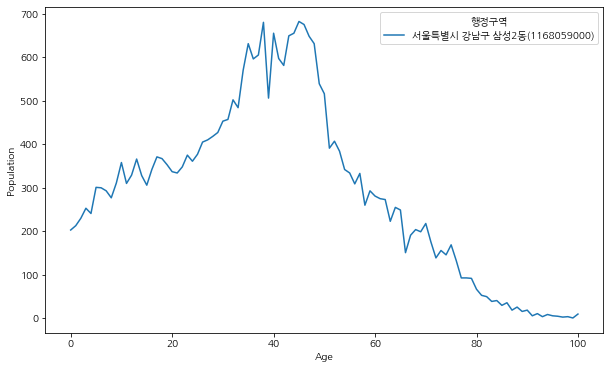

In [ ]:
df1.T.plot(figsize=(10,6))
plt.xlabel("Age")
plt.ylabel("Population")
plt.xticks(np.arange(0,120,20), labels=['0','20','40','60','80','100'])
plt.show()

# 총인구수 대비 20대 비율이 가장 높은 지역 구하기

In [ ]:
# 총 인구수로 나누기
df2 = df.div(df['총인구수'], axis=0)
df2.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.006214,0.007155,0.007540,0.007353,0.007272,0.008008,0.007648,0.007703,0.007281,0.007726,0.008174,0.007558,0.007343,0.008142,0.008428,0.008500,0.009468,0.011015,0.010687,0.011444,0.012271,0.012745,0.013668,0.014601,0.015158,0.016216,0.016389,0.015318,0.015173,0.015266,0.014869,0.015016,0.015302,0.015149,0.016622,0.017560,0.017564,0.017163,...,0.013574,0.014322,0.012102,0.010679,0.011605,0.008139,0.009051,0.009117,0.009004,0.009190,0.007424,0.006521,0.006587,0.006443,0.007598,0.006089,0.005160,0.005058,0.004378,0.003915,0.003487,0.003217,0.002659,0.002207,0.001948,0.001560,0.001371,0.001238,0.001031,0.000832,0.000598,0.000476,0.000364,0.000355,0.000261,0.000188,0.000146,0.000102,0.000075,0.000560
서울특별시 종로구 (1111000000),1.0,1.0,0.004213,0.005130,0.005886,0.005783,0.005550,0.006758,0.005873,0.006539,0.005938,0.006500,0.007036,0.006713,0.006513,0.007172,0.007540,0.007805,0.008878,0.010067,0.009957,0.012173,0.013885,0.013749,0.014777,0.015404,0.016644,0.017032,0.017264,0.016030,0.014887,0.014796,0.014137,0.013769,0.013872,0.012955,0.014156,0.014079,0.015068,0.014337,...,0.014053,0.015048,0.012528,0.011023,0.012031,0.008238,0.009466,0.009698,0.009466,0.010454,0.008264,0.007760,0.007792,0.008251,0.009621,0.008180,0.007069,0.007017,0.005964,0.005027,0.005033,0.004484,0.003722,0.003185,0.002720,0.002507,0.001951,0.001680,0.001493,0.001208,0.000963,0.000743,0.000614,0.000510,0.000523,0.000388,0.000297,0.000239,0.000168,0.001460
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.006103,0.006178,0.006781,0.007911,0.007309,0.008740,0.008816,0.008740,0.007685,0.008966,0.010850,0.009268,0.008137,0.010172,0.009494,0.010473,0.010398,0.012960,0.012884,0.012357,0.012131,0.014542,0.012658,0.011980,0.012734,0.012884,0.013487,0.011603,0.011377,0.014391,0.011076,0.013412,0.014316,0.012658,0.012658,0.014843,0.018309,0.016275,...,0.011076,0.012131,0.009494,0.009569,0.010322,0.006178,0.008514,0.008891,0.008062,0.009569,0.008363,0.007836,0.007384,0.007987,0.009117,0.007459,0.006857,0.007836,0.006254,0.005576,0.005726,0.004370,0.004144,0.003843,0.002260,0.002260,0.000980,0.001808,0.001356,0.000904,0.000904,0.001055,0.000527,0.000527,0.000603,0.000226,0.000377,0.000075,0.000075,0.001281
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004555,0.006673,0.007944,0.007203,0.008050,0.008580,0.007838,0.008791,0.006991,0.009215,0.007309,0.008156,0.006037,0.006885,0.008686,0.006779,0.008897,0.008580,0.009957,0.009427,0.009957,0.009533,0.009745,0.011545,0.011651,0.012922,0.014723,0.011969,0.011651,0.014405,0.014935,0.014405,0.013664,0.014405,0.016630,0.013982,0.018112,0.016100,...,0.013452,0.014405,0.011545,0.010380,0.012075,0.008156,0.008050,0.010168,0.009533,0.010062,0.008050,0.008156,0.007626,0.007203,0.008897,0.009533,0.008580,0.006885,0.006567,0.006567,0.005826,0.006885,0.005296,0.003495,0.002754,0.002330,0.002860,0.002754,0.001801,0.001589,0.001165,0.001377,0.000741,0.000530,0.000741,0.000318,0.000636,0.000424,0.000424,0.001801
서울특별시 종로구 삼청동(1111054000),1.0,1.0,0.004128,0.001376,0.007568,0.004472,0.004128,0.004472,0.006880,0.003784,0.007224,0.007224,0.008256,0.007224,0.006536,0.005504,0.007224,0.006536,0.008944,0.009288,0.009976,0.009632,0.013760,0.008944,0.012728,0.014448,0.013072,0.012728,0.009976,0.012384,0.010664,0.016168,0.009976,0.011696,0.012384,0.012040,0.012384,0.016168,0.017544,0.016168,...,0.017200,0.017544,0.014792,0.013072,0.014448,0.008600,0.009632,0.013072,0.011352,0.014104,0.009976,0.007912,0.012384,0.006536,0.014448,0.010320,0.011352,0.006880,0.006880,0.005848,0.007568,0.005848,0.004472,0.004816,0.005504,0.004472,0.002752,0.002752,0.0020

In [ ]:
df2 = df2.drop(["총인구수", "연령구간인구수"], axis = 1)

In [ ]:
df2.loc[:, "20세":"29세"].sum(axis=1).sort_values(ascending=False).index[:3]

Index(['서울특별시 광진구 화양동(1121571000)', '경기도 파주시 월롱면(4148031000)',
       '서울특별시 관악구 신림동(1162069500)'],
      dtype='object', name='행정구역')

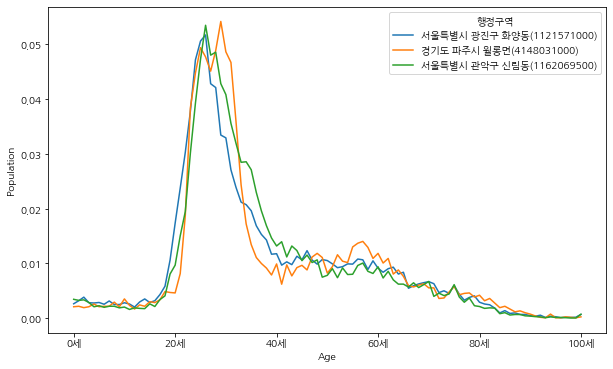

In [ ]:
df2.loc[df2.loc[:, "20세":"29세"].sum(axis=1).sort_values(ascending=False).index[:3]].T.plot(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Population')
plt.xticks(np.arange(0,120,20), labels=['0세','20세','40세','60세','80세','100세'])
plt.show()

# 총인구수 대비 고령 인구 분포가 가장 많은 지역의 고령 인구 분포 그래프 그리기

In [ ]:
# 총 인구수로 나누기
df3 = df.div(df['총인구수'], axis=0)
df3.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.006214,0.007155,0.007540,0.007353,0.007272,0.008008,0.007648,0.007703,0.007281,0.007726,0.008174,0.007558,0.007343,0.008142,0.008428,0.008500,0.009468,0.011015,0.010687,0.011444,0.012271,0.012745,0.013668,0.014601,0.015158,0.016216,0.016389,0.015318,0.015173,0.015266,0.014869,0.015016,0.015302,0.015149,0.016622,0.017560,0.017564,0.017163,...,0.013574,0.014322,0.012102,0.010679,0.011605,0.008139,0.009051,0.009117,0.009004,0.009190,0.007424,0.006521,0.006587,0.006443,0.007598,0.006089,0.005160,0.005058,0.004378,0.003915,0.003487,0.003217,0.002659,0.002207,0.001948,0.001560,0.001371,0.001238,0.001031,0.000832,0.000598,0.000476,0.000364,0.000355,0.000261,0.000188,0.000146,0.000102,0.000075,0.000560
서울특별시 종로구 (1111000000),1.0,1.0,0.004213,0.005130,0.005886,0.005783,0.005550,0.006758,0.005873,0.006539,0.005938,0.006500,0.007036,0.006713,0.006513,0.007172,0.007540,0.007805,0.008878,0.010067,0.009957,0.012173,0.013885,0.013749,0.014777,0.015404,0.016644,0.017032,0.017264,0.016030,0.014887,0.014796,0.014137,0.013769,0.013872,0.012955,0.014156,0.014079,0.015068,0.014337,...,0.014053,0.015048,0.012528,0.011023,0.012031,0.008238,0.009466,0.009698,0.009466,0.010454,0.008264,0.007760,0.007792,0.008251,0.009621,0.008180,0.007069,0.007017,0.005964,0.005027,0.005033,0.004484,0.003722,0.003185,0.002720,0.002507,0.001951,0.001680,0.001493,0.001208,0.000963,0.000743,0.000614,0.000510,0.000523,0.000388,0.000297,0.000239,0.000168,0.001460
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.006103,0.006178,0.006781,0.007911,0.007309,0.008740,0.008816,0.008740,0.007685,0.008966,0.010850,0.009268,0.008137,0.010172,0.009494,0.010473,0.010398,0.012960,0.012884,0.012357,0.012131,0.014542,0.012658,0.011980,0.012734,0.012884,0.013487,0.011603,0.011377,0.014391,0.011076,0.013412,0.014316,0.012658,0.012658,0.014843,0.018309,0.016275,...,0.011076,0.012131,0.009494,0.009569,0.010322,0.006178,0.008514,0.008891,0.008062,0.009569,0.008363,0.007836,0.007384,0.007987,0.009117,0.007459,0.006857,0.007836,0.006254,0.005576,0.005726,0.004370,0.004144,0.003843,0.002260,0.002260,0.000980,0.001808,0.001356,0.000904,0.000904,0.001055,0.000527,0.000527,0.000603,0.000226,0.000377,0.000075,0.000075,0.001281
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004555,0.006673,0.007944,0.007203,0.008050,0.008580,0.007838,0.008791,0.006991,0.009215,0.007309,0.008156,0.006037,0.006885,0.008686,0.006779,0.008897,0.008580,0.009957,0.009427,0.009957,0.009533,0.009745,0.011545,0.011651,0.012922,0.014723,0.011969,0.011651,0.014405,0.014935,0.014405,0.013664,0.014405,0.016630,0.013982,0.018112,0.016100,...,0.013452,0.014405,0.011545,0.010380,0.012075,0.008156,0.008050,0.010168,0.009533,0.010062,0.008050,0.008156,0.007626,0.007203,0.008897,0.009533,0.008580,0.006885,0.006567,0.006567,0.005826,0.006885,0.005296,0.003495,0.002754,0.002330,0.002860,0.002754,0.001801,0.001589,0.001165,0.001377,0.000741,0.000530,0.000741,0.000318,0.000636,0.000424,0.000424,0.001801
서울특별시 종로구 삼청동(1111054000),1.0,1.0,0.004128,0.001376,0.007568,0.004472,0.004128,0.004472,0.006880,0.003784,0.007224,0.007224,0.008256,0.007224,0.006536,0.005504,0.007224,0.006536,0.008944,0.009288,0.009976,0.009632,0.013760,0.008944,0.012728,0.014448,0.013072,0.012728,0.009976,0.012384,0.010664,0.016168,0.009976,0.011696,0.012384,0.012040,0.012384,0.016168,0.017544,0.016168,...,0.017200,0.017544,0.014792,0.013072,0.014448,0.008600,0.009632,0.013072,0.011352,0.014104,0.009976,0.007912,0.012384,0.006536,0.014448,0.010320,0.011352,0.006880,0.006880,0.005848,0.007568,0.005848,0.004472,0.004816,0.005504,0.004472,0.002752,0.002752,0.0020

In [ ]:
# 총인구수와 연령구간인구수 열 제거하기
df3 = df3.drop(['총인구수', '연령구간인구수'], axis=1)
df3.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,24세,25세,26세,27세,28세,29세,30세,31세,32세,33세,34세,35세,36세,37세,38세,39세,...,61세,62세,63세,64세,65세,66세,67세,68세,69세,70세,71세,72세,73세,74세,75세,76세,77세,78세,79세,80세,81세,82세,83세,84세,85세,86세,87세,88세,89세,90세,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.006214,0.007155,0.007540,0.007353,0.007272,0.008008,0.007648,0.007703,0.007281,0.007726,0.008174,0.007558,0.007343,0.008142,0.008428,0.008500,0.009468,0.011015,0.010687,0.011444,0.012271,0.012745,0.013668,0.014601,0.015158,0.016216,0.016389,0.015318,0.015173,0.015266,0.014869,0.015016,0.015302,0.015149,0.016622,0.017560,0.017564,0.017163,0.016773,0.014184,...,0.013574,0.014322,0.012102,0.010679,0.011605,0.008139,0.009051,0.009117,0.009004,0.009190,0.007424,0.006521,0.006587,0.006443,0.007598,0.006089,0.005160,0.005058,0.004378,0.003915,0.003487,0.003217,0.002659,0.002207,0.001948,0.001560,0.001371,0.001238,0.001031,0.000832,0.000598,0.000476,0.000364,0.000355,0.000261,0.000188,0.000146,0.000102,0.000075,0.000560
서울특별시 종로구 (1111000000),0.004213,0.005130,0.005886,0.005783,0.005550,0.006758,0.005873,0.006539,0.005938,0.006500,0.007036,0.006713,0.006513,0.007172,0.007540,0.007805,0.008878,0.010067,0.009957,0.012173,0.013885,0.013749,0.014777,0.015404,0.016644,0.017032,0.017264,0.016030,0.014887,0.014796,0.014137,0.013769,0.013872,0.012955,0.014156,0.014079,0.015068,0.014337,0.014389,0.011721,...,0.014053,0.015048,0.012528,0.011023,0.012031,0.008238,0.009466,0.009698,0.009466,0.010454,0.008264,0.007760,0.007792,0.008251,0.009621,0.008180,0.007069,0.007017,0.005964,0.005027,0.005033,0.004484,0.003722,0.003185,0.002720,0.002507,0.001951,0.001680,0.001493,0.001208,0.000963,0.000743,0.000614,0.000510,0.000523,0.000388,0.000297,0.000239,0.000168,0.001460
서울특별시 종로구 청운효자동(1111051500),0.006103,0.006178,0.006781,0.007911,0.007309,0.008740,0.008816,0.008740,0.007685,0.008966,0.010850,0.009268,0.008137,0.010172,0.009494,0.010473,0.010398,0.012960,0.012884,0.012357,0.012131,0.014542,0.012658,0.011980,0.012734,0.012884,0.013487,0.011603,0.011377,0.014391,0.011076,0.013412,0.014316,0.012658,0.012658,0.014843,0.018309,0.016275,0.017480,0.014316,...,0.011076,0.012131,0.009494,0.009569,0.010322,0.006178,0.008514,0.008891,0.008062,0.009569,0.008363,0.007836,0.007384,0.007987,0.009117,0.007459,0.006857,0.007836,0.006254,0.005576,0.005726,0.004370,0.004144,0.003843,0.002260,0.002260,0.000980,0.001808,0.001356,0.000904,0.000904,0.001055,0.000527,0.000527,0.000603,0.000226,0.000377,0.000075,0.000075,0.001281
서울특별시 종로구 사직동(1111053000),0.004555,0.006673,0.007944,0.007203,0.008050,0.008580,0.007838,0.008791,0.006991,0.009215,0.007309,0.008156,0.006037,0.006885,0.008686,0.006779,0.008897,0.008580,0.009957,0.009427,0.009957,0.009533,0.009745,0.011545,0.011651,0.012922,0.014723,0.011969,0.011651,0.014405,0.014935,0.014405,0.013664,0.014405,0.016630,0.013982,0.018112,0.016100,0.014935,0.013346,...,0.013452,0.014405,0.011545,0.010380,0.012075,0.008156,0.008050,0.010168,0.009533,0.010062,0.008050,0.008156,0.007626,0.007203,0.008897,0.009533,0.008580,0.006885,0.006567,0.006567,0.005826,0.006885,0.005296,0.003495,0.002754,0.002330,0.002860,0.002754,0.001801,0.001589,0.001165,0.001377,0.000741,0.000530,0.000741,0.000318,0.000636,0.000424,0.000424,0.001801
서울특별시 종로구 삼청동(1111054000),0.004128,0.001376,0.007568,0.004472,0.004128,0.004472,0.006880,0.003784,0.007224,0.007224,0.008256,0.007224,0.006536,0.005504,0.007224,0.006536,0.008944,0.009288,0.009976,0.009632,0.013760,0.008944,0.012728,0.014448,0.013072,0.012728,0.009976,0.012384,0.010664,0.016168,0.009976,0.011696,0.012384,0.012040,0.012384,0.016168,0.017544,0.016168,0.017200,0.013760,...,0.017200,0.017544,0.014792,0.013072,0.014448,0.008600,0.009632,0.013072,0.011352,0.014104,0.009976,0.007912,0.012384,0.006536,0.014448,0.010320,0.011352,0.006880,0.006880,0.005848,0.007568,0.005848,0.004472,0.0048

In [ ]:
# 고령 인구(70세 이상) 비율 확인하기
cols = df3.columns[[i for i in range(70,101)]]             # 고령인구(70세 이상) 선택
df3.loc[:,cols].sum(axis=1).sort_values(ascending = False) # 고령인구 비율이 많은 행정구역 내림차순 정렬

행정구역
전라남도 고흥군 도양읍소록출장소(4677025400)    0.568627
경상북도 의성군 신평면(4773045000)         0.447016
강원도 철원군 근북면(4278033000)          0.433628
경상남도 의령군 궁류면(4872041500)         0.431373
전라남도 완도군 청산면모도출장소(4689035500)    0.428571
                                   ...   
경상남도 거제시 아주동(4831054000)         0.019315
충청남도 천안시 서북구 불당동(4413356500)     0.018976
전라남도 순천시 해룡면신대출장소(4615031600)    0.018346
경상북도 구미시 공단2동(4719062200)        0.017697
충청남도 계룡시 신도안면(4425033000)        0.010407
Length: 3829, dtype: float64

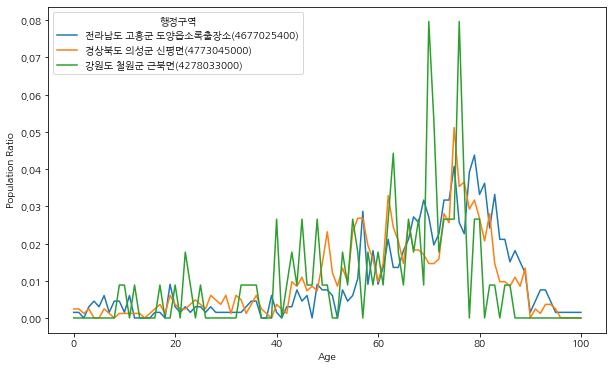

In [ ]:
# 고령 인구(70세 이상)가 가장 많은 5개의 행정구역 인구 분포 그래프로 확인하기
df3.loc[df3.loc[:,cols].sum(axis=1).sort_values(ascending = False).index[:3]].T.plot(figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Population Ratio')
plt.xticks(np.arange(0,120,20), labels=['0','20','40','60','80','100'])
plt.rc('font', family='NanumGothicEco')
plt.show()

In [ ]:
# 연령별 4개 그룹(그룹1:70-79, 그룹2:80-89, 그룹3:90-99, 그룹4:100이상)으로 나누기
a = df3.loc[df3.loc[:,cols].sum(axis=1).sort_values(ascending = False).index[:3]].T  
print(a)
bins = list(range(70, 120, 10))                                 
age_label = ['70~79세','80~89세','90~99세','100세이상']         
b = a.reset_index(drop=True) 
print(b.index)
b['age'] = pd.cut(b.index,bins,right=False,labels=age_label)
age_group = b.groupby('age').sum()
age_group

행정구역     전라남도 고흥군 도양읍소록출장소(4677025400)  ...  강원도 철원군 근북면(4278033000)
0세                            0.001508  ...                      0.0
1세                            0.001508  ...                      0.0
2세                            0.000000  ...                      0.0
3세                            0.003017  ...                      0.0
4세                            0.004525  ...                      0.0
...                                ...  ...                      ...
96세                           0.001508  ...                      0.0
97세                           0.001508  ...                      0.0
98세                           0.001508  ...                      0.0
99세                           0.001508  ...                      0.0
100세 이상                       0.001508  ...                      0.0

[101 rows x 3 columns]
RangeIndex(start=0, stop=101, step=1)


행정구역,전라남도 고흥군 도양읍소록출장소(4677025400),경상북도 의성군 신평면(4773045000),강원도 철원군 근북면(4278033000)
age,,,
70~79세,0.304676,0.282582,0.371681
80~89세,0.229261,0.151035,0.061947
90~99세,0.033183,0.013398,0.000000
100세이상,0.001508,0.000000,0.000000


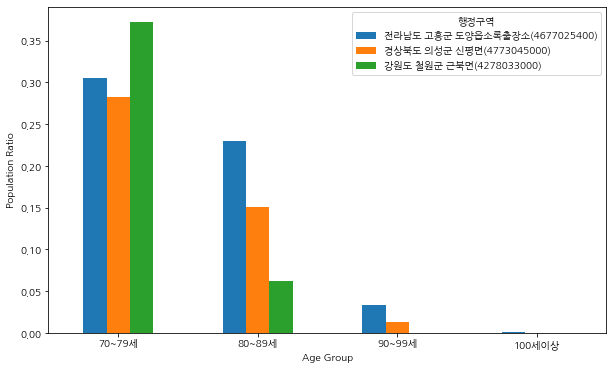

In [ ]:
# 막대그래프 그리기
age_group.plot.bar(rot=0, figsize=(10, 6))                                             
plt.xlabel("Age Group")                                                   
plt.ylabel("Population Ratio")   
plt.rc('font', family='NanumGothic')                                    
plt.show()